# Insurance Fraud Detection
The insurance industry involves the sale of insurance policies to individuals and businesses, which provide financial protection against potential losses or damages. Fraud can occur in the insurance industry in a variety of ways, including false or exaggerated claims, fake policies, and identity theft. Insurers use a variety of tools and techniques, including data analysis and machine learning, to detect and prevent fraudulent activity.

![image](https://i.pinimg.com/564x/83/d7/04/83d704021c5eb918b2dc28f2f92b2c5b.jpg)

In [177]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [178]:
data = pd.read_csv('dataset.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [179]:
data.replace('?', np.nan, inplace = True)

In [180]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [182]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

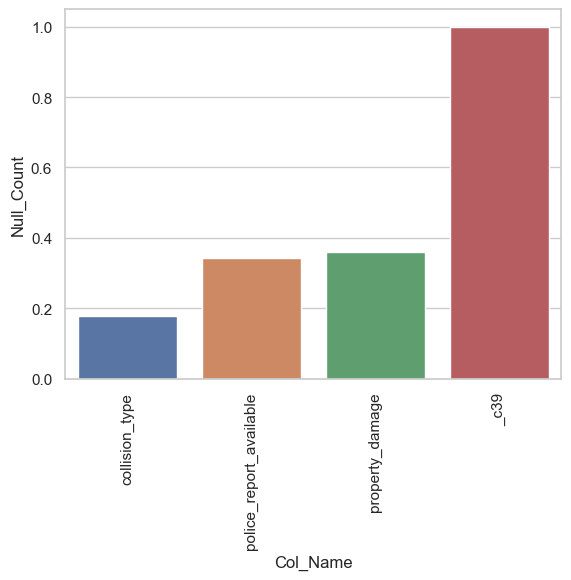

In [183]:
missing = data.isnull().sum() / len(data) # perncentage 
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns=['Null_Count']
missing.index.names=['Col_Name']
missing = missing.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Col_Name',y='Null_Count',data=missing)
plt.xticks(rotation=90)
plt.show()

In [184]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

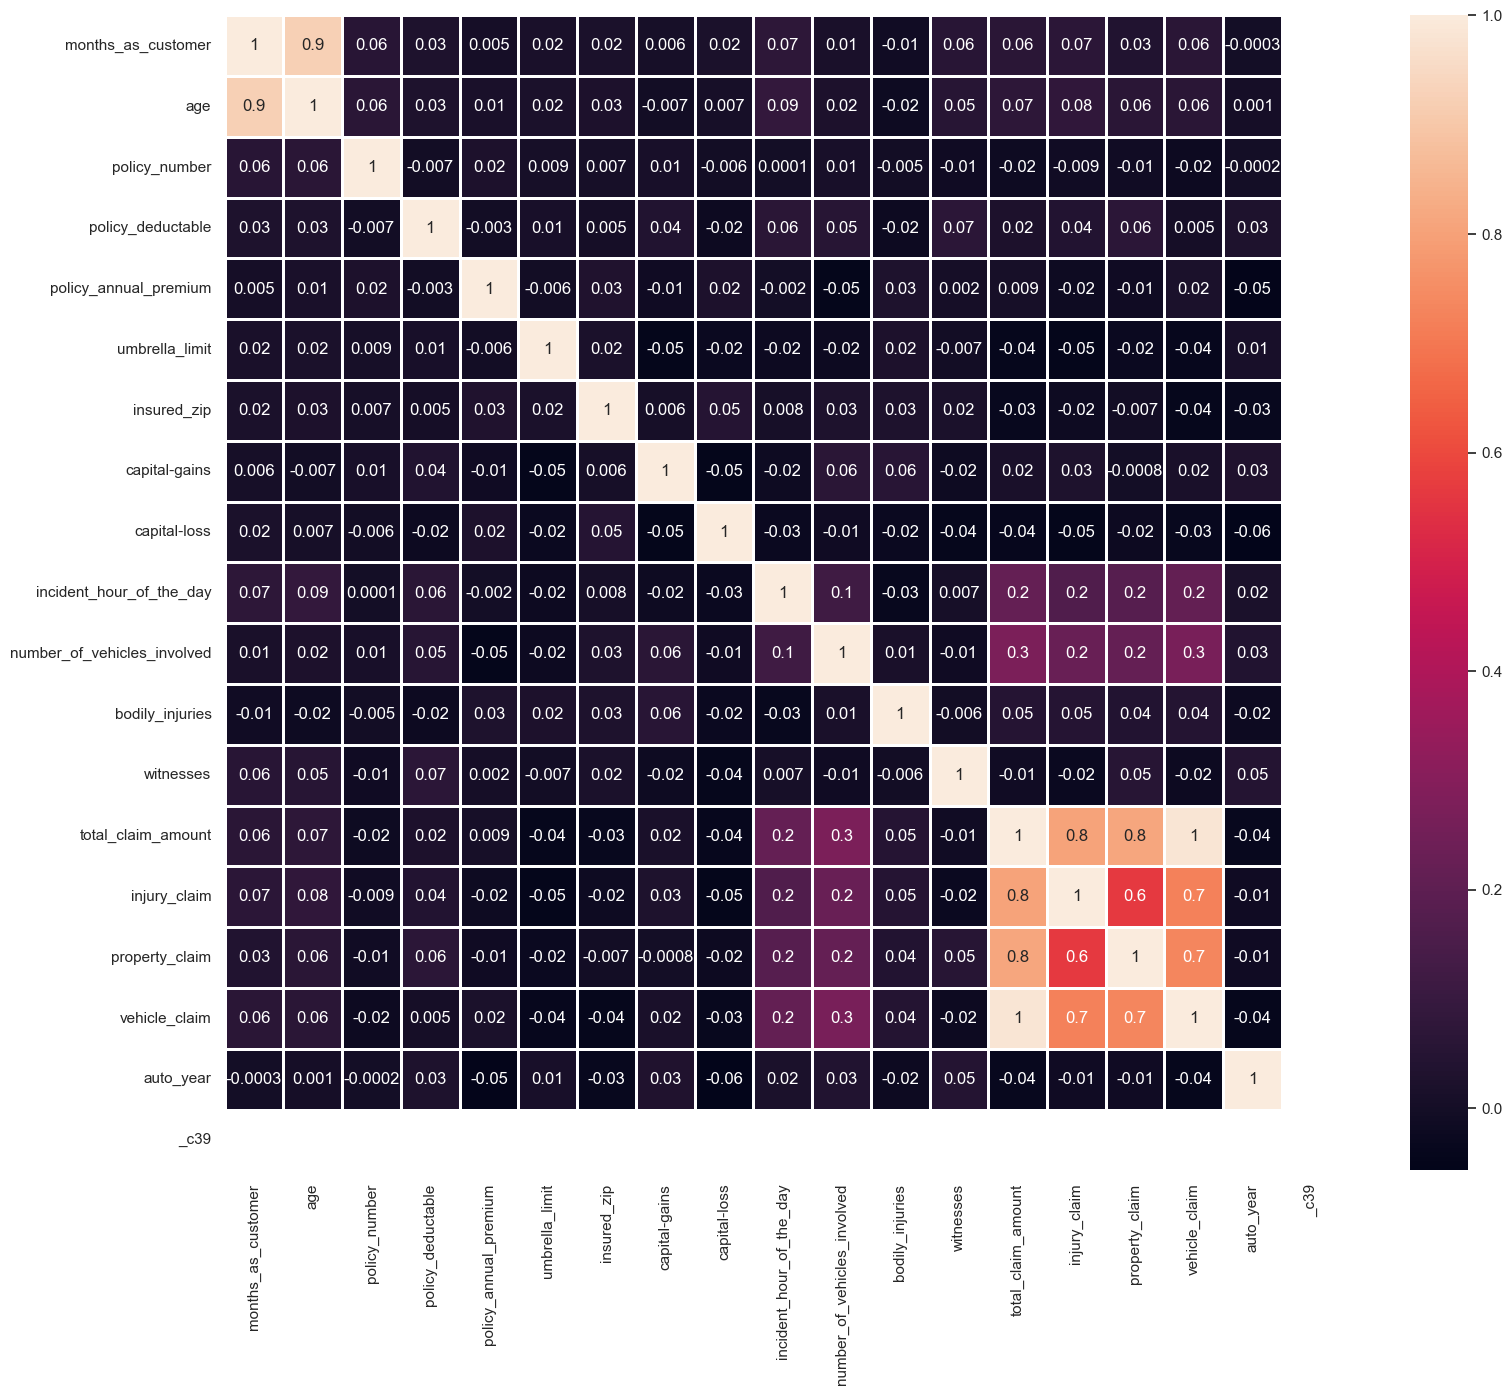

In [185]:
plt.figure(figsize = (18, 15))

corr = data.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 2)
plt.show()

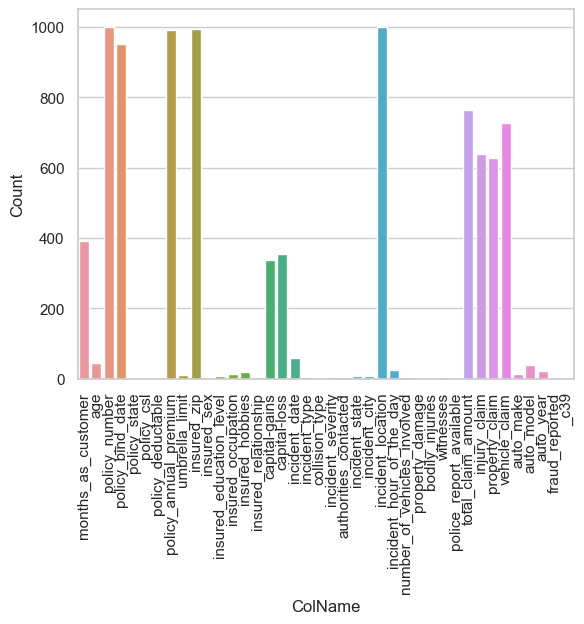

In [186]:
unique = data.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColName',y='Count',data=unique)
plt.xticks(rotation=90)
plt.show()

In [187]:
unique.sort_values(by='Count',ascending=False)

,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [188]:
# Drop Columns that are not used in our project
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

data.drop(to_drop, inplace = True, axis = 1)

In [189]:
data.head()


ColName,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


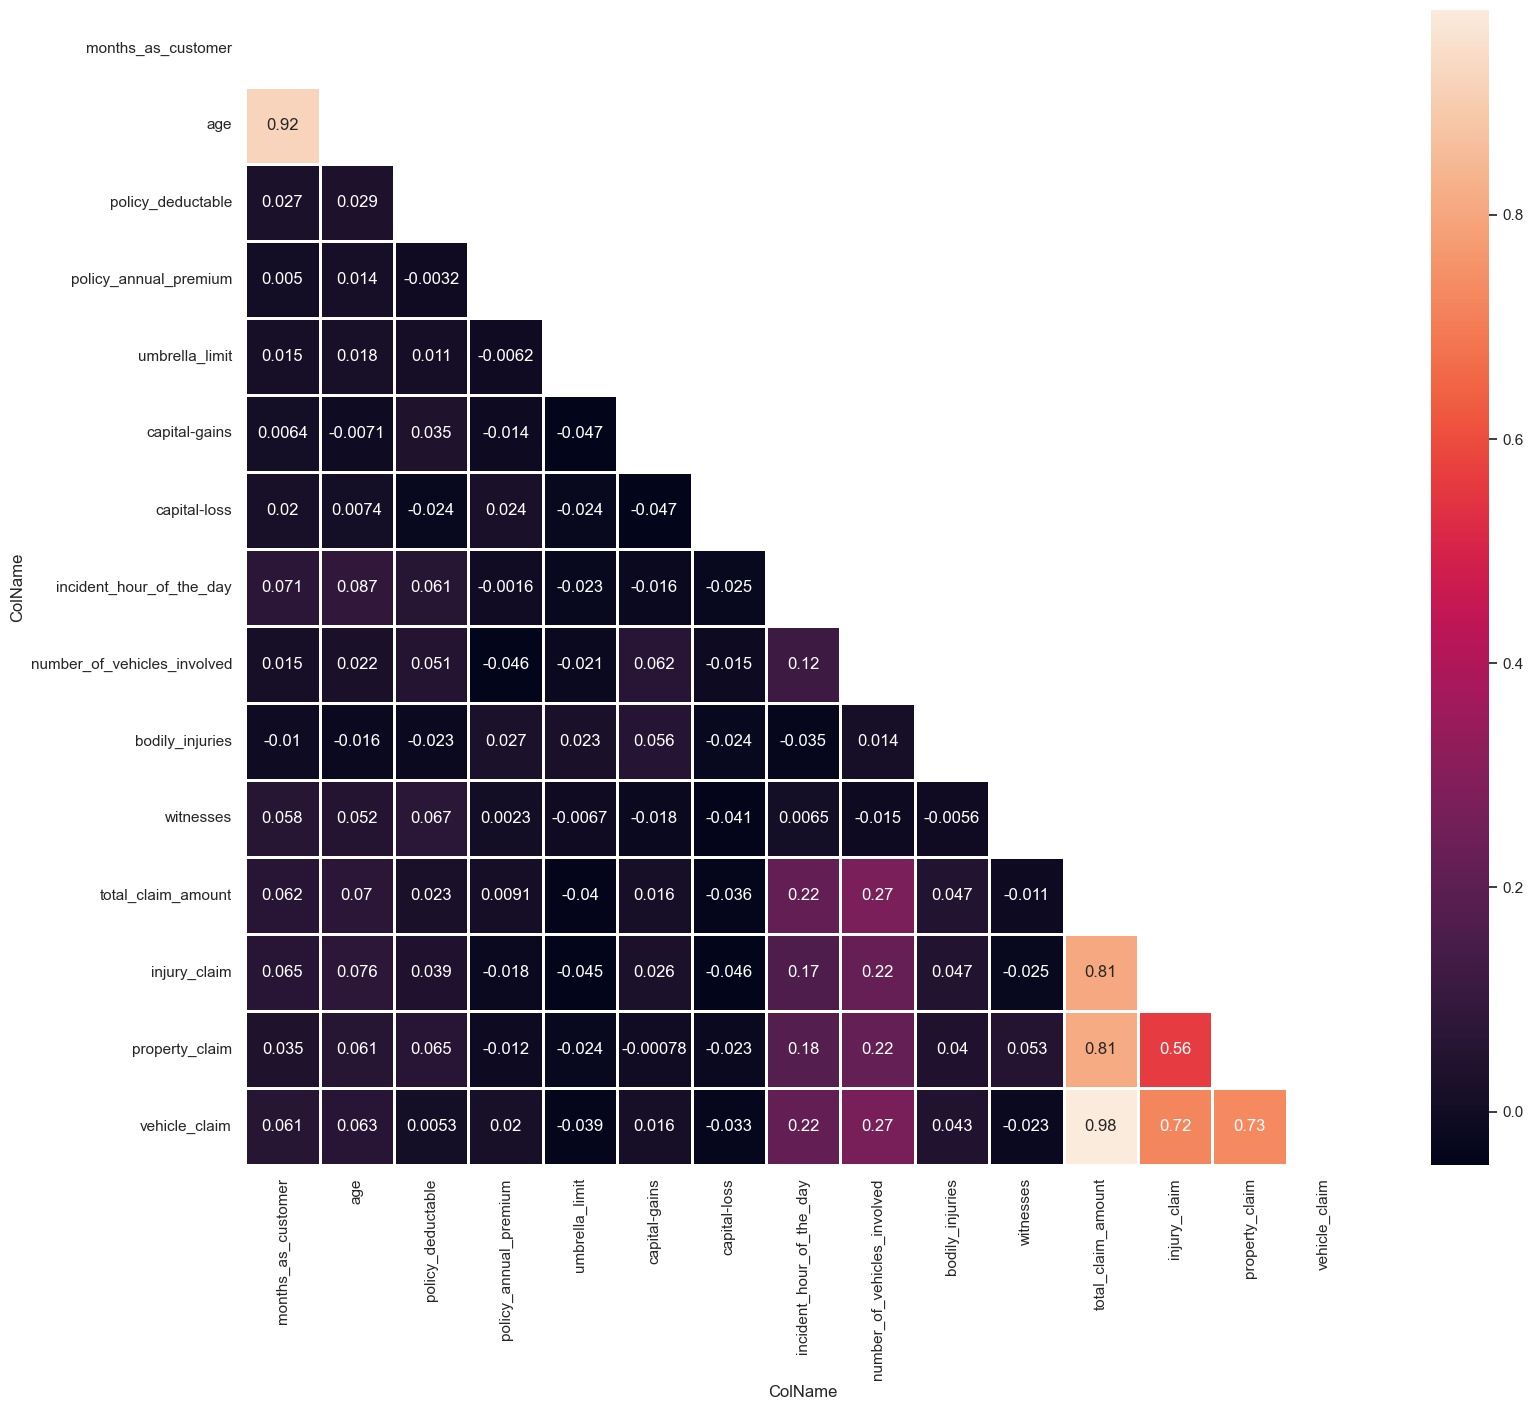

In [190]:
plt.figure(figsize = (18, 15))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

#### High Correlation in 'age' and 'month_as_customer' columns, along with columns like - 'total_claim_amount','injury_claim','property_claim', 'vehicle_claim'. So removing columns 'age' and 'total_claim_amount' to change the correction between them, Other  I don't delete because we need others in our model.

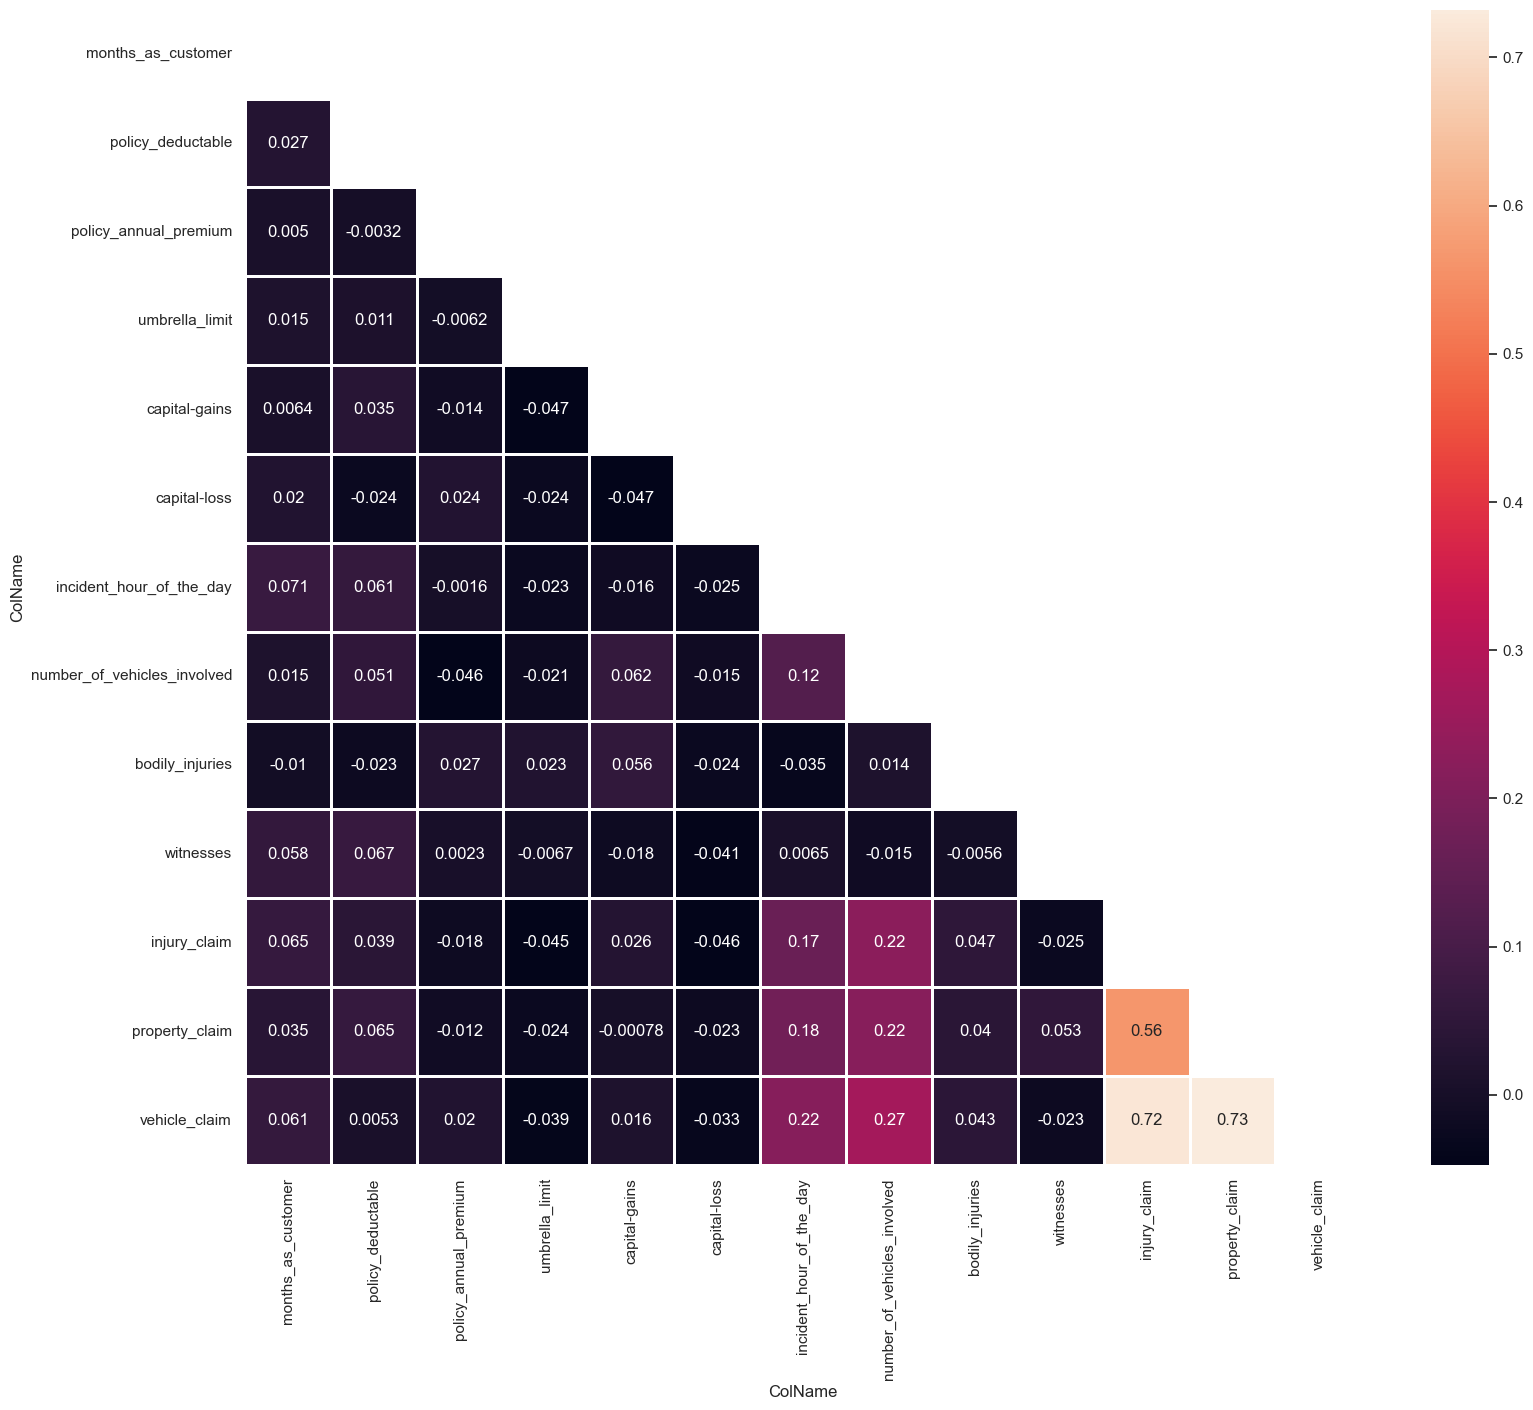

In [210]:
plt.figure(figsize = (18, 15))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [191]:
data.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [192]:
data.head()

ColName,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [204]:
# Get Target and Indpendent Features Seperated
X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [205]:
# Converting Label Columns into Numerical by doing One-Encoding
categorical_cols = X.select_dtypes(include = ['object'])
categorical_cols = pd.get_dummies(categorical_cols, drop_first = True)
categorical_cols.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [206]:
numerical_col = X.select_dtypes(include = ['int64'])
X = pd.concat([numerical_col, categorical_cols], axis = 1)


In [207]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


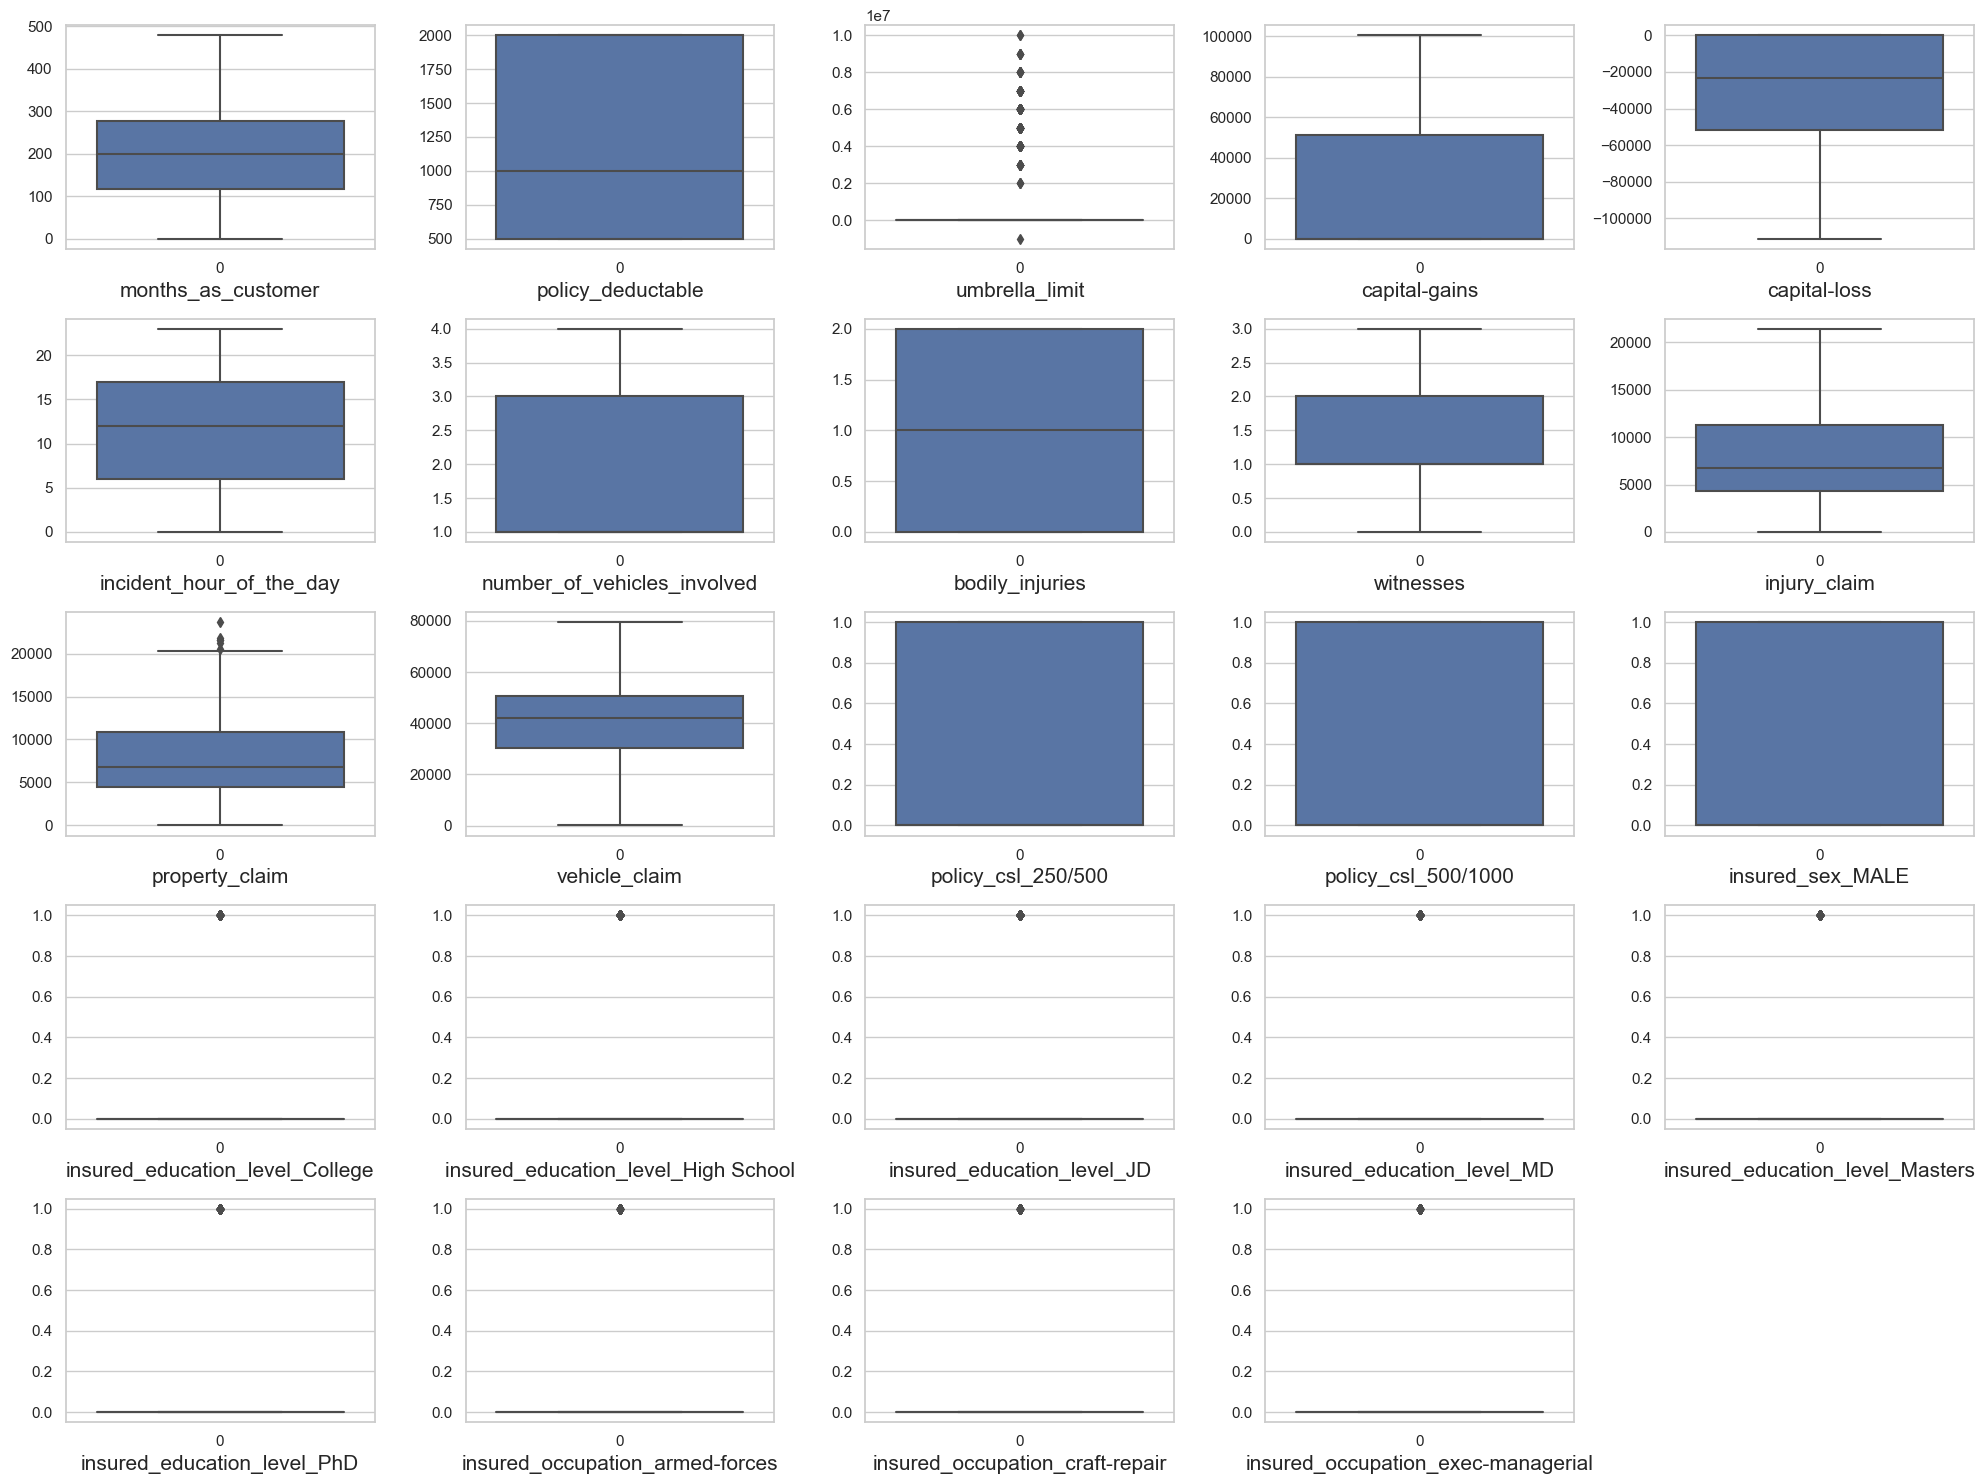

In [209]:
# Outlier Check

plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

## Outliers are in there, so we need to Standarise those columns using Standard Scaler

In [31]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [32]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
860,230,1000,0,0,-45300,13,3,1,2,10700,...,0,1,0,0,0,0,1,0,0,1
396,409,1000,6000000,55600,0,19,1,1,0,6110,...,1,0,0,0,0,0,1,0,0,0
800,95,2000,0,48900,0,22,1,0,3,3480,...,0,1,0,0,0,0,0,1,1,0
249,94,2000,0,0,-52600,19,1,1,3,6410,...,0,0,0,0,1,0,0,0,0,1
419,138,500,5000000,56900,-56900,6,1,2,0,14740,...,1,1,0,0,0,0,1,0,0,0


In [211]:
numerical_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [212]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [213]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = numerical_data.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
860,0.245144,-0.251318,-0.484594,-0.896757,-0.637476,0.202688,1.132368,-0.004924,0.493161,0.680899,0.686933,-0.022682
396,1.798116,-0.251318,2.093035,1.103092,0.968540,1.068874,-0.824489,-0.004924,-1.324385,-0.267899,1.003269,0.902574
800,-0.926092,1.373582,-0.484594,0.862103,0.968540,1.501968,-0.824489,-1.235854,1.401934,-0.811545,-0.091418,-0.713195
249,-0.934768,1.373582,-0.484594,-0.896757,-0.896282,1.068874,-0.824489,-0.004924,1.401934,-0.205886,-0.205882,0.706867
419,-0.553032,-1.063768,1.663430,1.149851,-1.048729,-0.807864,-0.824489,1.226006,-1.324385,1.516007,1.527719,1.500772


In [214]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [215]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [216]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
860,0.245144,-0.251318,-0.484594,-0.896757,-0.637476,0.202688,1.132368,-0.004924,0.493161,0.680899,...,0,1,0,0,0,0,1,0,0,1
396,1.798116,-0.251318,2.093035,1.103092,0.968540,1.068874,-0.824489,-0.004924,-1.324385,-0.267899,...,1,0,0,0,0,0,1,0,0,0
800,-0.926092,1.373582,-0.484594,0.862103,0.968540,1.501968,-0.824489,-1.235854,1.401934,-0.811545,...,0,1,0,0,0,0,0,1,1,0
249,-0.934768,1.373582,-0.484594,-0.896757,-0.896282,1.068874,-0.824489,-0.004924,1.401934,-0.205886,...,0,0,0,0,1,0,0,0,0,1
419,-0.553032,-1.063768,1.663430,1.149851,-1.048729,-0.807864,-0.824489,1.226006,-1.324385,1.516007,...,1,1,0,0,0,0,1,0,0,0


# Modelling
## Support Vector Classifier

In [224]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

In [226]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
svc_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",svc_model_train_acc)
print("Testing Accuracy: ", svc_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.828
Testing Accuracy:  0.776
[[194   0]
 [ 56   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       194
           1       0.00      0.00      0.00        56

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.78      0.68       250



## K-Nearest Neighborhood

In [228]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [229]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",knn_model_train_acc)
print("Testing Accuracy: ", knn_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.7466666666666667
Testing Accuracy:  0.776
[[194   0]
 [ 56   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       194
           1       0.00      0.00      0.00        56

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.78      0.68       250



## Decision Tree Classifier

In [230]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [232]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ",decision_tree_model_train_acc)
print("Test accuracy: ",decision_tree_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  0.3
[[ 48 146]
 [ 29  27]]
              precision    recall  f1-score   support

           0       0.62      0.25      0.35       194
           1       0.16      0.48      0.24        56

    accuracy                           0.30       250
   macro avg       0.39      0.36      0.30       250
weighted avg       0.52      0.30      0.33       250



In [46]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(decision_tree_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [233]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 70}
0.8013333333333333


In [234]:
decision_tree_model = grid_search.best_estimator_
y_pred = decision_tree_model.predict(X_test)

In [235]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {decision_tree_model_train_acc}")
print(f"Test accuracy of Decision Tree is : {decision_tree_model_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8066666666666666
Test accuracy of Decision Tree is : 0.844
[[169  25]
 [ 14  42]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       194
           1       0.63      0.75      0.68        56

    accuracy                           0.84       250
   macro avg       0.78      0.81      0.79       250
weighted avg       0.86      0.84      0.85       250



## Random Forest Classifier

In [236]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [238]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ", rf_model_train_acc)
print("Test accuracy: ", rf_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  0.824
[[184  10]
 [ 34  22]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       194
           1       0.69      0.39      0.50        56

    accuracy                           0.82       250
   macro avg       0.77      0.67      0.70       250
weighted avg       0.81      0.82      0.81       250



## Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(base_estimator = decision_tree_model)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada_model, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)


In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 70}
0.8013333333333333


In [ ]:
ada_model = grid_search.best_estimator_
y_pred = ada_model.predict(X_test)

In [ ]:
ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.8066666666666666
Test accuracy of Ada Boost is : 0.844
[[169  25]
 [ 14  42]]
              precision    recall  f1-score   support

           N       0.92      0.87      0.90       194
           Y       0.63      0.75      0.68        56

    accuracy                           0.84       250
   macro avg       0.78      0.81      0.79       250
weighted avg       0.86      0.84      0.85       250



## Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.932
Test Accuracy of Gradient Boosting Classifier is 0.284 

Confusion Matrix :- 
[[ 16 178]
 [  1  55]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.94      0.08      0.15       194
           Y       0.24      0.98      0.38        56

    accuracy                           0.28       250
   macro avg       0.59      0.53      0.27       250
weighted avg       0.78      0.28      0.20       250



## Stochastic Gradient Boosting

In [58]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.9266666666666666
Test Accuracy of Stochastic Gradient Boosting is 0.276 

Confusion Matrix :- 
[[ 14 180]
 [  1  55]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.93      0.07      0.13       194
           Y       0.23      0.98      0.38        56

    accuracy                           0.28       250
   macro avg       0.58      0.53      0.26       250
weighted avg       0.78      0.28      0.19       250



## XgBoost Classifier

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [66]:
y_test = le.fit_transform(y_test)

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [67]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.736
[[154  40]
 [ 26  30]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       194
           1       0.43      0.54      0.48        56

    accuracy                           0.74       250
   macro avg       0.64      0.66      0.65       250
weighted avg       0.76      0.74      0.75       250



In [ ]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

In [69]:
xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

In [70]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.8066666666666666
Test accuracy of XgBoost is : 0.844
[[169  25]
 [ 14  42]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       194
           1       0.63      0.75      0.68        56

    accuracy                           0.84       250
   macro avg       0.78      0.81      0.79       250
weighted avg       0.86      0.84      0.85       250



## Cat Boost Classifier

In [72]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5730282	total: 59.7ms	remaining: 537ms
1:	learn: 0.4637104	total: 61.5ms	remaining: 246ms
2:	learn: 0.4434368	total: 63.1ms	remaining: 147ms
3:	learn: 0.4211538	total: 64.7ms	remaining: 97ms
4:	learn: 0.3936747	total: 66.2ms	remaining: 66.2ms
5:	learn: 0.3645963	total: 68ms	remaining: 45.4ms
6:	learn: 0.3411517	total: 69.8ms	remaining: 29.9ms
7:	learn: 0.3265072	total: 71.3ms	remaining: 17.8ms
8:	learn: 0.3157283	total: 73.1ms	remaining: 8.12ms
9:	learn: 0.2972717	total: 74.7ms	remaining: 0us


In [73]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.9
Test Accuracy of Cat Boost Classifier is 0.696 

Confusion Matrix :- 
[[140  54]
 [ 22  34]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.72      0.79       194
           1       0.39      0.61      0.47        56

    accuracy                           0.70       250
   macro avg       0.63      0.66      0.63       250
weighted avg       0.76      0.70      0.72       250



## Extra Trees Classifier

In [74]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.832 

Confusion Matrix :- 
[[180  14]
 [ 28  28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       194
           1       0.67      0.50      0.57        56

    accuracy                           0.83       250
   macro avg       0.77      0.71      0.73       250
weighted avg       0.82      0.83      0.82       250



## Voting Classifier

In [77]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc_model), ('knn_model', knn_model),  ('Decision Tree', decision_tree_model), ('Random Forest', rf_model),
               ('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.5730282	total: 2.81ms	remaining: 25.3ms
1:	learn: 0.4637104	total: 4.65ms	remaining: 18.6ms
2:	learn: 0.4434368	total: 6.5ms	remaining: 15.2ms
3:	learn: 0.4211538	total: 8.15ms	remaining: 12.2ms
4:	learn: 0.3936747	total: 9.75ms	remaining: 9.75ms
5:	learn: 0.3645963	total: 11.8ms	remaining: 7.89ms
6:	learn: 0.3411517	total: 13.6ms	remaining: 5.84ms
7:	learn: 0.3265072	total: 15.5ms	remaining: 3.88ms
8:	learn: 0.3157283	total: 17.4ms	remaining: 1.94ms
9:	learn: 0.2972717	total: 19.2ms	remaining: 0us


In [78]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.9213333333333333
Test accuracy of Voting Classifier is : 0.848
[[170  24]
 [ 14  42]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       194
           1       0.64      0.75      0.69        56

    accuracy                           0.85       250
   macro avg       0.78      0.81      0.79       250
weighted avg       0.86      0.85      0.85       250



## Models Comparison

In [80]:
models = pd.DataFrame({
    'Model' : ['svc_model', 'knn_model', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_model_test_acc, knn_model_test_acc, decision_tree_model_test_acc, rf_model_test_acc, ada_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
10,Voting Classifier,0.848
2,Decision Tree,0.844
4,Ada Boost,0.844
9,XgBoost,0.844
8,Extra Trees,0.832
3,Random Forest,0.808
0,SVC,0.776
1,KNN,0.776
7,Cat Boost,0.696
5,Gradient Boost,0.284


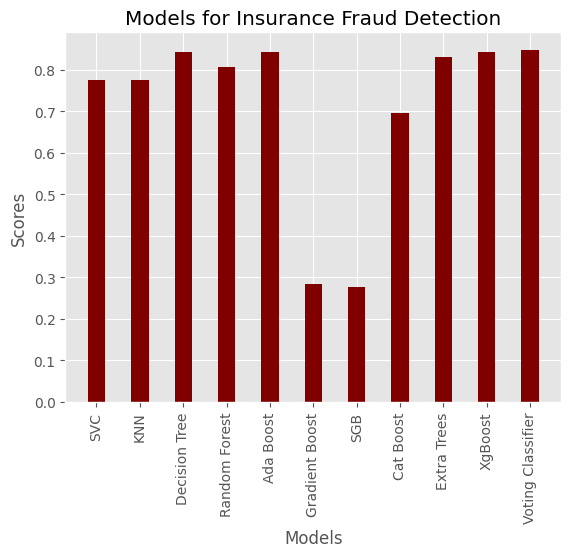

In [95]:
plt.bar(models['Model'],models['Score'], width=0.4, color='maroon')
plt.xlabel("Models")
plt.xticks(rotation=90)
plt.ylabel("Scores")
plt.title("Models for Insurance Fraud Detection")
plt.show()